# Assignment 2: Regression Modeling


**Objective**: In this assignment we will build a regression model using sklearn. 

Please do not share this material on any platform or by any other means.

Important Notes:

    Make changes to the cells that have #YOUR CODE HERE or #YOUR COMMENT HERE.Do not write your answer in anywhere else other than where it says YOUR CODE HERE (or YOUR COMMENT HERE).

    Your code must run without any errors start to end. Please go to menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all) before submitting your work.

    Purpose of the assignment is to assess your knowledge and command of the data mining algorithms, python programming language, and your ability to resolve common errors. Grading is based on the code and your interpretation/comments you are submitting, not the formatting of the results.

    Please use the examples as a guideline, you are not expected to have the same formatting as the example, unless it is a formatting question.

Remember, there are many ways to code that can lead to the correct answer, do not hesitate to exercise your own style and python programming coventions.

## Regression Modeling: Predicting Boston Housing Prices

HomeVal AI is a pioneering project initiated by a collaboration of urban planners, data scientists, and real estate analysts. The goal is to develop a robust model to predict housing prices in Boston. This initiative is crucial for understanding housing market trends, assisting in policy-making, and guiding potential buyers and real estate developers.

You are working as a data scientist at HomeVal AI coorporation. You are tasked with developing a regression model to predict housing prices, and to start with you have the Boston Housing price data. 

Best way to start any project is by understanding the data, and building a simple model to get your project off the ground. You will start by developing a linear regression model!

Regression is the task of predicting a continious-valued class labels (dependent variable) based on the values of other attributes (independent or predictor variables).

The file _BostonHousingExtended.csv_ contains information collected by the US Bureau of the Census concerning housing in the area of Boston, Massachusetts. The dataset includes information on 506 census housing tracts in the Boston area. The goal is to predict the median house price in new tracts based on information such as crime rate, pollution, and number of rooms. The dataset contains 12 predictors + their interactions, and the outcome variable is the median house price (MEDV).
 

**Data Set Characteristics:**  
Number of Instances: 506

Number of Attributes: 12 numeric/categorical predictive, plut their interactions. Median Value (attribute 13) is usually the target.

Original Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town       
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres       
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000

- PTRATIO  pupil-teacher ratio by town

- LSTAT    % lower status of the population       

- MEDV     Median value of owner-occupied homes in $1000's

Creator: Harrison, D. and Rubinfeld, D.L.
This is a copy of UCI ML housing dataset.

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

For the purposes of this assignment, the original data has been processed to include 2-way interactions of these variables (using PolynomialFeatures function), and the dataset we use has 91 features in total. 

#### Read in and review the data

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('BostonHousingExtended.csv',header='infer')
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,70,71,72,73,74,75,76,77,78,MEDV
0,0.000000,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.000000,0.000000,0.00000,0.043270,0.059749,0.018655,0.082503,0.025759,0.008042,24.0
1,0.000236,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.004564,0.024052,0.00889,0.011017,0.058064,0.021462,0.306021,0.113111,0.041808,21.6


In [2]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,70,71,72,73,74,75,76,77,78,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,...,0.267554,0.271992,0.148420,0.281505,0.297077,0.161667,0.440980,0.204698,0.129599,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,...,0.385317,0.322171,0.213532,0.347008,0.284685,0.194503,0.250593,0.168367,0.161755,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,...,0.023399,0.048566,0.019679,0.030826,0.087624,0.026190,0.260751,0.071486,0.020748,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,...,0.061484,0.116559,0.046154,0.074475,0.142115,0.065424,0.470858,0.155388,0.070612,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,...,0.914122,0.808511,0.161454,0.835619,0.739077,0.256045,0.653689,0.311613,0.176497,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.914122,0.808511,1.000000,1.000000,0.797872,0.914122,1.000000,0.825020,1.000000,50.000000


In [3]:
df.shape

(506, 91)

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '73', '74', '75', '76', '77', '78', 'MEDV'],
      dtype='object')

## Q1: Why should the data be partitioned into training and test sets? What will the training set be used for? What will the validation set be used for?

Yes, the data should be partitioned into training and test sets. The training set aims to force the model to learn its coefficients. The validation set, or test set, intends to test the model we trained whether perform in a good manner in case of Bias vs Variance. In other words, the validation set can show the model performance under unmet data, whether overfitting or underfitting so that we can adjust the model parameters accordingly.



## Q2: Split the dataset into training and test datasets
Use random state = 0. 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns=["MEDV"])  # This will remove the MEDV column from df and assign the result to X
y = df["MEDV"]  

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0)

## Q3: Fit a linear regression model to the median house price (MEDV) as a function of all other features. Build a prediction model to predict the median house price given the predictors in the model.

Use random state = 0.

In [8]:
from sklearn.linear_model import LinearRegression

house_lm = LinearRegression()
house_lm.fit(x_train,y_train)

LinearRegression()

## Q4: Apply the model you developed in Q3 on the test dataset.

In [9]:
y_pred = house_lm.predict(x_test)

## Q5: How good did the model perform on the test dataset? Use the LinearRegression.score() function, calculate the MSE, R^2, and Adjusted R^2, and interpret the results.

In [10]:
from sklearn.metrics import mean_squared_error
import dmba

# Calculate R^2
r_squared = house_lm.score(x_test, y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Adjusted R^2
n = x_test.shape[0]  # Number of observations
p = x_test.shape[1]  # Number of features
adjusted_r_squared = 1 - ((1-r_squared) * ((n-1) / (n-p-1)))

# Print the results
print(f"R^2: {r_squared}")
print(f"MSE: {mse}")
print(f"Adjusted R^2: {adjusted_r_squared}")

R^2: 0.8047024244983622
MSE: 15.955619635918312
Adjusted R^2: 0.3164584857442676


If you are on track, your graph might look like this:

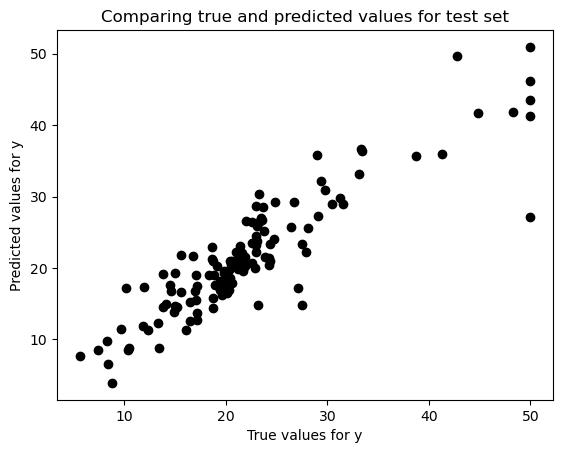

In [11]:
import matplotlib.pyplot as plt
# Comparing true versus predicted values
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y');

* The R^2 value is 0.8047, which means that approximately 80.47% of the variability in the dependent variable (y) can be explained by the independent variable(s) in the model. 
* The MSE is 15.9556, which is the average squared difference between the predicted values and the actual values. This means that, on average, the predictions are about square(15.9556) units away from the actual values.
* The adjusted R^2 is 0.3164, which adjusts the R^2 for the number of predictors in the model relative to the number of data points. It's surprising to see such a low adjusted R^2 compared to the R^2. It makes sense the model using 91 features in total
* The graph shows the prediction vs true value, most of the values are followed by the y=x line, indicating the good accuracy of the predictions. However, there are some points in the top-right, which are the highest values around 50, don't demonstrate a good predicted values due to model's incapability of predicting highest values (outliers). 


## Q6: Can regularization improve our metrics? Use Ridge and Lasso, and compare the results.

Most of the time there is discrepancy between performance on the training set and the test set, which may be an indication of under- or over-fitting. When suspected, Ridge and Lasso Regression models are used.

Ridge regression formula makes predictions the same way as ordinary least squares (linear regression). However in Ridge regression there is a penalty term employed to avoid overfitting, as a result it produces a more restricted model. When Ridge training set score is less than the Linear Regression model training set score, and Ridge test set score is higher than the Linear Regression model test set score, we can conclude that Linear Model is overfitting. If this is the case, you should proceed with Ridge model since it generalizes better (based on the higher test score).

Ridge balances model simplicity and training score (The simpler the model, the smaller the training score would be) using parameter alpha. Higher alpha values result in smaller coefficients. You can test multiple alpha values in your analysis.

Lasso also has a penalty term, and some features are entirely ignored by the model by setting coefficients of those features to 0. This is helpful in identifying which features are important , and with any reduction in feature size, the model also may become more interpretable.

In [12]:
from sklearn.linear_model import Ridge, Lasso

In [20]:
# RIDGE with alpha 1
house_lm_ridge = Ridge(alpha= 1)
house_lm_ridge.fit(x_train,y_train)

ridge_y_pred = house_lm_ridge.predict(x_test)


# Calculate R^2
r_squared = house_lm_ridge.score(x_test, y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, ridge_y_pred)

# Calculate Adjusted R^2
n = x_test.shape[0]  # Number of observations
p = x_test.shape[1]  # Number of features
# adjusted_r_squared = 1 - ((1-r_squared) * ((n-1) / (n-p-1)))
adjusted_r_squared = dmba.adjusted_r2_score(y_test, ridge_y_pred, house_lm_ridge)
# Print the results
print(f"R^2: {r_squared}")
print(f"MSE: {mse}")
print(f"Adjusted R^2: {adjusted_r_squared}")

R^2: 0.7521081452840319
MSE: 20.25252046540198
Adjusted R^2: 0.1323785084941117


In [21]:
# RIDGE with alpha 0.001
house_lm_ridge = Ridge(alpha= 0.001)
house_lm_ridge.fit(x_train,y_train)

ridge_y_pred = house_lm_ridge.predict(x_test)

# Calculate R^2
r_squared = house_lm_ridge.score(x_test, y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, ridge_y_pred)

# Calculate Adjusted R^2
n = x_test.shape[0]  # Number of observations
p = x_test.shape[1]  # Number of features
# adjusted_r_squared = 1 - ((1-r_squared) * ((n-1) / (n-p-1)))
adjusted_r_squared =  dmba.adjusted_r2_score(y_test, ridge_y_pred, house_lm_ridge)
# Print the results
print(f"R^2: {r_squared}")
print(f"MSE: {mse}")
print(f"Adjusted R^2: {adjusted_r_squared}")

R^2: 0.8113250152367677
MSE: 15.41456049294156
Adjusted R^2: 0.33963755332868695


Ridge Regression with alpha = 1:

* R^2: 0.7521 suggests that the model explains 75.21% of the variance in the dependent variable.
* MSE: 20.2525 suggests that the predictions are, on average, squared(20.2525) units away from the actual values.
* Adjusted R^2: 0.1324 is significantly lower than the R^2, indicating that when the number of predictors is accounted for, the model does not explain much of the variance. This could be a sign of overfitting despite the regularization.

Ridge Regression with alpha = 0.001:
* R^2: 0.8113 indicates the model explains 81.13% of the variance, which is a better fit than the model with alpha = 1.
* MSE: 15.414 suggests slightly better predictions compared to the alpha = 1 model, with predictions being squared(15.414) units from the actual values.
* Adjusted R^2: 0.3396 is higher than for alpha = 1, but still quite low relative to the R^2 value, which again indicates potential overfitting.

This discrepancy suggests that the number of predictors might be too high relative to the number of observations, or that there are irrelevant predictors in the model that do not contribute to its predictive power. 
However, comparing to plain linear regression, based on the given Ridge regression metrics, which indicate a better fit and predictive accuracy than the plain linear regression: 

* R^2: It has increased from 0.8047 to 0.8113. This indicates that the Ridge regression model with alpha = 0.001 explains more of the variance in the dependent variable than the plain linear regression model.
* MSE: It has decreased from 15.9556 to 15.4146. This suggests that the Ridge regression model's predictions are on average closer to the actual values than those of the plain linear regression model.
* Adjusted R^2: It has increased from 0.3165 to 0.3396. Even though it is still quite low, the increase indicates that the Ridge regression model might generalize better when the number of predictors is taken into account.

In [70]:
# LASSO

house_lm_lasso = Lasso(alpha=1)
house_lm_lasso.fit(x_train,y_train)

lasso_y_pred = house_lm_lasso.predict(x_test)

# Calculate R^2
r_squared = house_lm_lasso.score(x_test, y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lasso_y_pred)

# Calculate Adjusted R^2
n = x_test.shape[0]  # Number of observations
p = x_test.shape[1]  # Number of features
adjusted_r_squared = 1 - ((1-r_squared) * ((n-1) / (n-p-1)))

# Print the results
print(f"R^2: {r_squared}")
print(f"MSE: {mse}")
print(f"Adjusted R^2: {adjusted_r_squared}")

R^2: 0.209375032595166
MSE: 64.59328141770018
Adjusted R^2: -1.7671873859169192


In [73]:
# LASSO

house_lm_lasso = Lasso(alpha=0.0001, max_iter= 100000)
house_lm_lasso.fit(x_train,y_train)

lasso_y_pred = house_lm_lasso.predict(x_test)

# Calculate R^2
r_squared = house_lm_lasso.score(x_test, y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lasso_y_pred)

# Calculate Adjusted R^2
n = x_test.shape[0]  # Number of observations
p = x_test.shape[1]  # Number of features
adjusted_r_squared = 1 - ((1-r_squared) * ((n-1) / (n-p-1)))

# Print the results
print(f"R^2: {r_squared}")
print(f"MSE: {mse}")
print(f"Adjusted R^2: {adjusted_r_squared}")

R^2: 0.8117375542670064
MSE: 15.380856460341292
Adjusted R^2: 0.34108143993452256


The Lasso model with alpha = 1 has a negative R^2 value, which means that the model is worse than a simple average of the outcome variable. A negative adjusted r squared indicates that the model has no predictive value, and that you should either remove some predictors or try a different model.

Comparing to the plain model, the lasso model with alpha = 0.0001 and max_iter= 100000 (Increase the number of iterations: Allow the algorithm more time to find a minimum to avoid instead of showing the model is not convergent). The new Lasso model shows an improvement in all three metrics compared to both the plain linear regression model and the previous Lasso model with the convergence warning. Specifically:
* The R^2 has increased slightly from the plain linear regression, indicating that the Lasso model explains a slightly larger proportion of the variance in the dependent variable. This is a sign of a good fit.
* The MSE has decreased, which suggests that the Lasso model's predictions are on average slightly closer to the actual values than those of the plain linear regression model.
* The Adjusted R^2 has also increased from both the plain linear regression and the previous Lasso model, indicating that when you account for the number of predictors, the new Lasso model fits the data better.

The increase in both R^2 and Adjusted R^2, along with the decrease in MSE, indicates that the Lasso model is capturing more of the true signal and possibly reducing overfitting by effectively penalizing and possibly excluding irrelevant features

**Assignment 2 Complete!**